# <center>NBA Free Throw Percentage</center>
## <center> Is conventional wisdom on free throws backed up by the data? </center>

Being a good free throw shooter can mean the difference between winning and losing in basketball. Anyone who has ever played basketball has stood on the line shooting free throws for hours, in hopes of improvement. I want to know if the data backs up the claim that the only way to get better at free throws is to keep shooting. Is there another skill that can be worked on that coorelated with better free throw percentages? Furthermore, conventional wisdom puts the ball into the hands of a guard for important free throws. Is this the best methodology? Or could coaches win more games by giving the ball to someone else?

In [2]:
# loading the data
d <- read.csv("nbaStats.csv")

In [3]:
# selecting the variables we will use
stats <- data.frame(
fg <- d$FG,
fga <- d$FGA,
X3p <- d$X3P,
X3pa <- d$X3PA,
X2p <- d$X2P,
X2pa <- d$X2PA,
ft <- d$FT,
fta <- d$FTA,
ftpercent <- d$FT.,
orb <- d$ORB,
drb <- d$DRB,
trb <- d$TRB,
ast <- d$AST,
stl <- d$STL,
blk <- d$BLK,
tov <- d$TOV,
pf <- d$PF,
pts <- d$PTS,
dunks <- d$fg2_dunk)

colnames(stats) <- c("FG", "FGA", "IIIP", "IIIPA", "IIP", "IIPA", "FT", "FTA", "FTpercent", "ORB", "DRB", "TRB", "AST", "STL",
                    "BLK", "TOV", "PF", "PTS", "DUNK")

### Visualizing some initial coorelations:

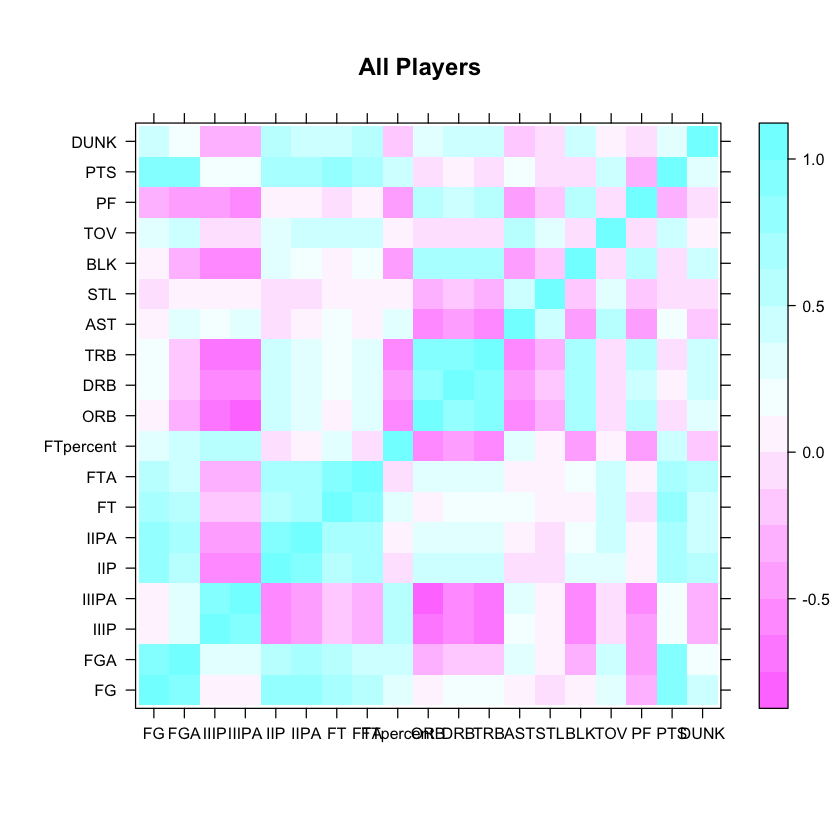

In [4]:
library(lattice)
levelplot(cor(stats), main = "All Players",xlab = " ", ylab = " ")

## Subsetting The Data

This chart shows a strong coorelation between free throw attempts and three pointers shot. This suggests that there is a difference between guards (those who shoot threes) and centers (those who generally do not). We are going to subset the data into these different groups. The data itself has labels for position, but these are not always black and white. I want to separate those who tend to shoot from farther out from "true centers." In other words, I want to segment out those players who tend to shoot threes, instead of strictly their position.

In [5]:
gaurds <- subset(stats, IIIP != 0)
posts <- subset(stats, IIIP == 0)

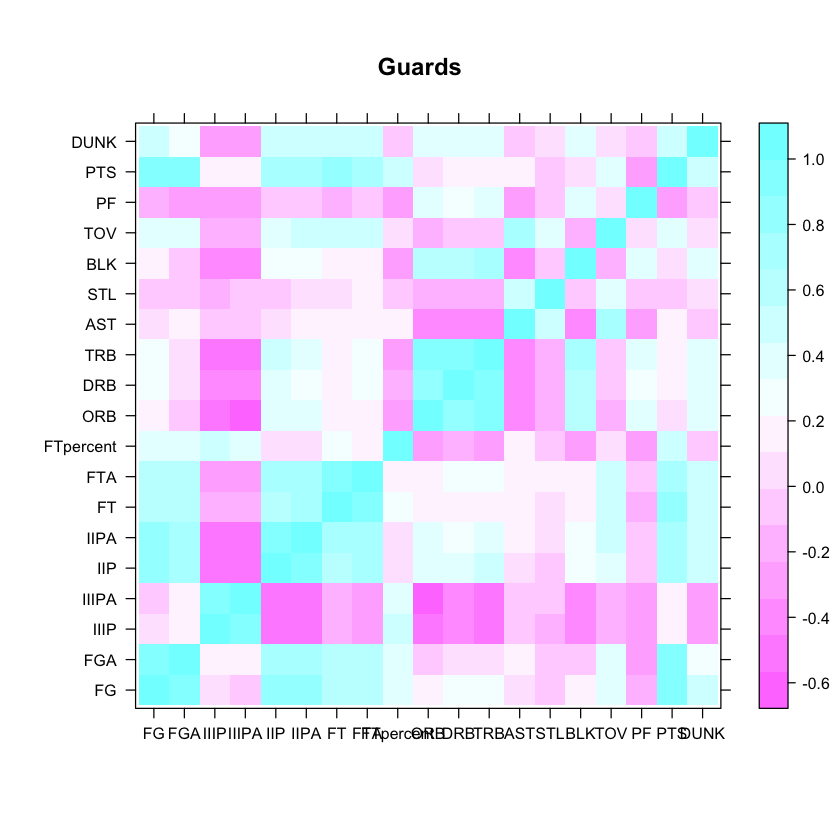

In [11]:
levelplot(cor(gaurds), main = "Guards",xlab = " ", ylab = " ")

Warning message in cor(posts):
“the standard deviation is zero”

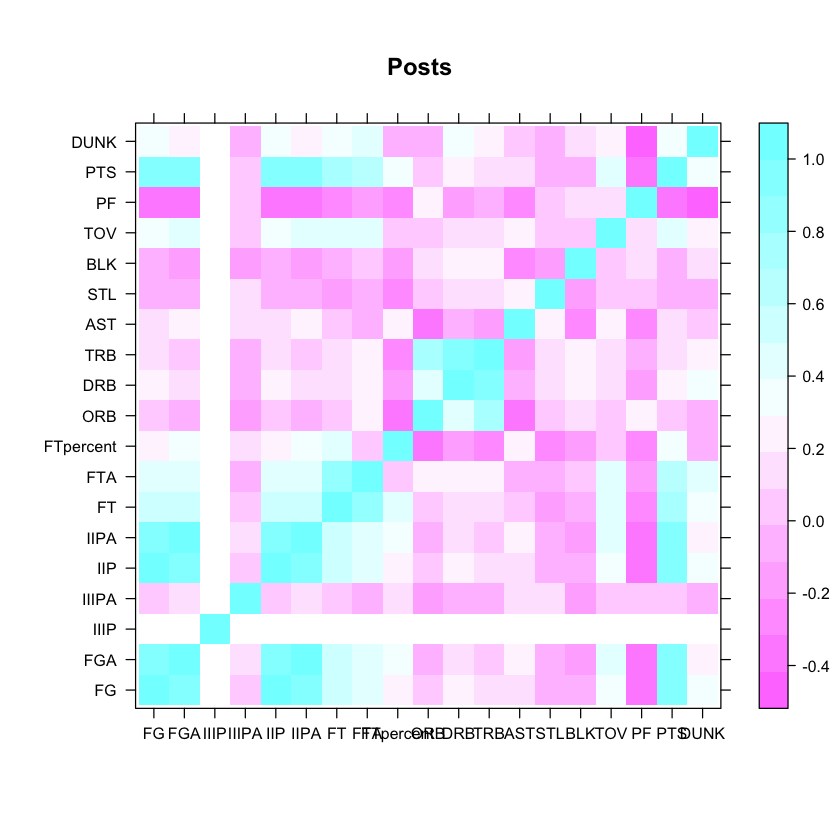

In [10]:
levelplot(cor(posts), main = "Posts", xlab = " ", ylab = " ")

## Models

Now that we have our data subsetted, lets see if we can predict what makes a good free throw shooter for gaurds and centers.


Call:
lm(formula = gaurds$FTpercent ~ gaurds$IIIPA)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43147 -0.04008  0.01245  0.04790  0.14351 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.700680   0.006753 103.761   <2e-16 ***
gaurds$IIIPA 0.011285   0.001145   9.853   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06969 on 526 degrees of freedom
Multiple R-squared:  0.1558,	Adjusted R-squared:  0.1542 
F-statistic: 97.08 on 1 and 526 DF,  p-value: < 2.2e-16


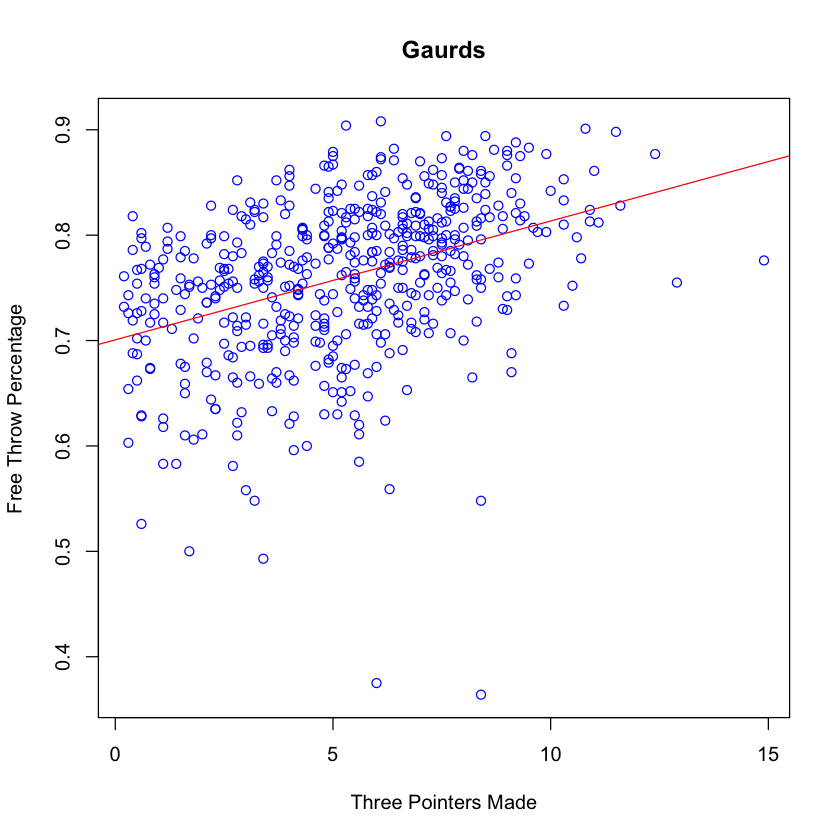

In [13]:
gaurdsModel <- lm(gaurds$FTpercent ~ gaurds$IIIPA)
summary(gaurdsModel)
plot(gaurds$FTpercent ~ gaurds$IIIPA, xlab = "Three Pointers Made", ylab = "Free Throw Percentage", main = "Gaurds",
    col = "blue")
abline(gaurdsModel, col = "red")

Great, so for gaurds, good shooters (those who tend to shoot more) make free throws. This is intuitive, and is common practice for important free throws to be shot by gaurds. But what about our post players?


Call:
lm(formula = posts$FTpercent ~ posts$IIP)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.312574 -0.062221  0.002115  0.069612  0.213338 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.540507   0.032643  16.558  < 2e-16 ***
posts$IIP   0.013825   0.004369   3.164  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09515 on 134 degrees of freedom
Multiple R-squared:  0.06953,	Adjusted R-squared:  0.06258 
F-statistic: 10.01 on 1 and 134 DF,  p-value: 0.001924


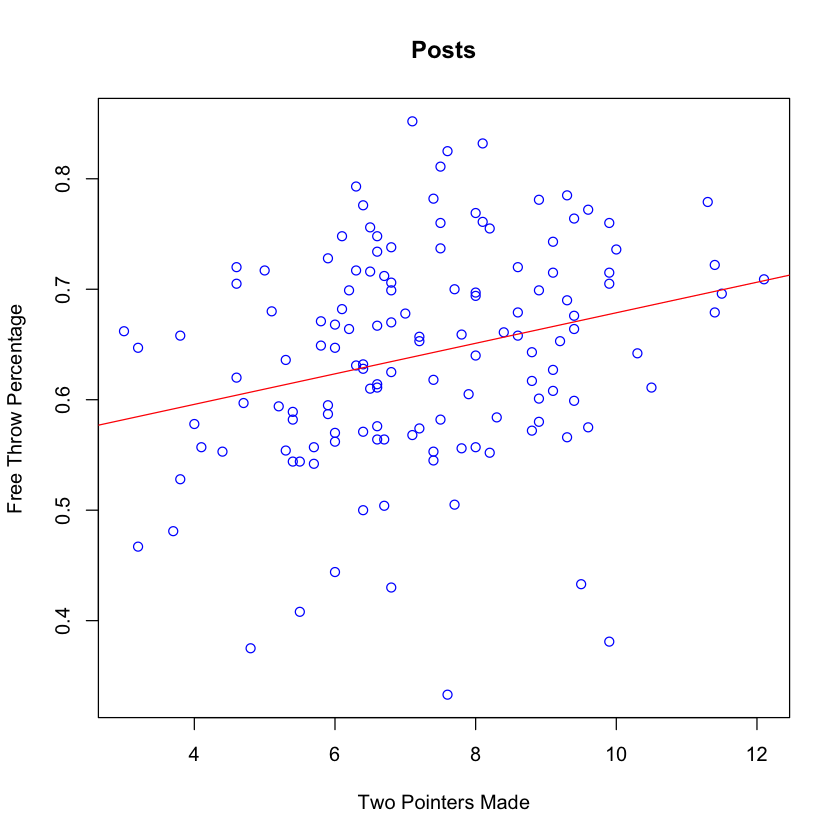

In [8]:
postsModel <- lm(posts$FTpercent ~ posts$IIP)
summary(postsModel)
plot(posts$FTpercent ~ posts$IIP, xlab = "Two Pointers Made", ylab = "Free Throw Percentage", main = "Posts",
    col = "blue")
abline(postsModel, col = "red")

For posts, there is a relation between their 2 point shots attempted and their free throw percentage, but it isnt nearly as strong as with guards. Lets see if we can explore this relationship more...

In [9]:
postsModel <- lm(posts$FTpercent ~ posts$TRB + posts$IIPA)
summary(postsModel)


Call:
lm(formula = posts$FTpercent ~ posts$TRB + posts$IIPA)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.313206 -0.051387  0.002194  0.060493  0.212887 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.660788   0.048486  13.628  < 2e-16 ***
posts$TRB   -0.011492   0.002825  -4.068 8.09e-05 ***
posts$IIPA   0.010303   0.002106   4.893 2.83e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08747 on 133 degrees of freedom
Multiple R-squared:  0.2196,	Adjusted R-squared:  0.2078 
F-statistic: 18.71 on 2 and 133 DF,  p-value: 6.913e-08


For posts, there seems to be a push/pull relationship between total rebounds and 2 pointers attempted. This seems to suggest that we have two classes of post players: those who get minutes because of their defensive presence, and those who are scorers. Intuitively, the more the shoot the better they are at free throws.

# Conclusion

To answer our first question: there was a significant difference between the free throw percentages of posts and gaurds. Gaurds tend to make more free throws than posts. So, if you have the option, give the ball to your gaurd to shoot the game winning shot. As far as finding a better coaching method for free throws, in both groups the strongest coorelation to free throw percentage was shots taken (2 pointers for posts and 3 pointers for gaurds). I think it is safe to assume that good shooters shoot more. Thus, common coaching methods for free throws seems to be accurate. If you want to get better, keep shooting, even if it isnt from the line. Being a better shooter helps your free throw percentage.

## Further Study

Ideally, we would ask the question of who to give the ball to in a pinch on data that only includes the last few minutes of a game. This data exists, but the NBA does not let you download it for analysis in this fashion.